In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading dataset
data=pd.read_csv('tourism.csv')

EDA

Univariate Analyis including shape of the dataset and find missing values 

In [3]:
# Exploring data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

Converting "objects" to "category" reduces the data space required to store the dataframe

In [4]:
data["TypeofContact"] = data["TypeofContact"].astype("category")
data["Occupation"] = data["Occupation"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["ProductPitched"] = data["ProductPitched"].astype("category")
data["MaritalStatus"] = data["MaritalStatus"].astype("category")
data["Designation"] = data["Designation"].astype("category")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CustomerID               4888 non-null   int64   
 1   ProdTaken                4888 non-null   int64   
 2   Age                      4662 non-null   float64 
 3   TypeofContact            4863 non-null   category
 4   CityTier                 4888 non-null   int64   
 5   DurationOfPitch          4637 non-null   float64 
 6   Occupation               4888 non-null   category
 7   Gender                   4888 non-null   category
 8   NumberOfPersonVisited    4888 non-null   int64   
 9   NumberOfFollowups        4843 non-null   float64 
 10  ProductPitched           4888 non-null   category
 11  PreferredPropertyStar    4862 non-null   float64 
 12  MaritalStatus            4888 non-null   category
 13  NumberOfTrips            4748 non-null   float64 
 14  Passport

The memory usage has decreased from 763.9KB to 526.2KB

In [6]:
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [7]:
data.shape

(4888, 20)

In [8]:
# Check if any missing value
data.isnull().any()

CustomerID                 False
ProdTaken                  False
Age                         True
TypeofContact               True
CityTier                   False
DurationOfPitch             True
Occupation                 False
Gender                     False
NumberOfPersonVisited      False
NumberOfFollowups           True
ProductPitched             False
PreferredPropertyStar       True
MaritalStatus              False
NumberOfTrips               True
Passport                   False
PitchSatisfactionScore     False
OwnCar                     False
NumberOfChildrenVisited     True
Designation                False
MonthlyIncome               True
dtype: bool

Data missing values in several columns 

In [9]:
data.isnull().values.any() # If there are any null values in data set

True

In [10]:
data = data.dropna()

In [11]:
data.isnull().any()

CustomerID                 False
ProdTaken                  False
Age                        False
TypeofContact              False
CityTier                   False
DurationOfPitch            False
Occupation                 False
Gender                     False
NumberOfPersonVisited      False
NumberOfFollowups          False
ProductPitched             False
PreferredPropertyStar      False
MaritalStatus              False
NumberOfTrips              False
Passport                   False
PitchSatisfactionScore     False
OwnCar                     False
NumberOfChildrenVisited    False
Designation                False
MonthlyIncome              False
dtype: bool

All missing values have been drop

In [12]:
data.drop('CustomerID', axis=1, inplace=True)

Insights:

Dropping the column Customer ID because it doesnt add any value to the prediction

Insights:

Convert the columns with an 'object' datatype into categorical variables

In [13]:
for feature in data.columns: # Loop through all columns in the dataframe
    if data[feature].dtype == 'object': # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])# Replace strings with an integer
data.head(10)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0
10,0,35.0,Self Enquiry,1,22.0,Small Business,Male,2,2.0,Basic,4.0,Divorced,1.0,0,3,1,1.0,Executive,17426.0


In [14]:
print(data.TypeofContact.value_counts())
print(data.Occupation.value_counts())
print(data.Gender.value_counts())
print(data.ProductPitched.value_counts())
print(data.MaritalStatus.value_counts())
print(data.Designation.value_counts())

Self Enquiry       2918
Company Invited    1210
Name: TypeofContact, dtype: int64
Salaried          1999
Small Business    1746
Large Business     381
Free Lancer          2
Name: Occupation, dtype: int64
Male       2463
Female     1510
Fe Male     155
Name: Gender, dtype: int64
Basic           1615
Deluxe          1422
Standard         737
Super Deluxe     250
King             104
Name: ProductPitched, dtype: int64
Married      1990
Divorced      789
Unmarried     682
Single        667
Name: MaritalStatus, dtype: int64
Executive         1615
Manager           1422
Senior Manager     737
AVP                250
VP                 104
Name: Designation, dtype: int64


In [15]:
oneHotCols=["TypeofContact","Occupation","Gender","ProductPitched", "MaritalStatus","Designation"]

In [16]:
data=pd.get_dummies(data,columns=oneHotCols)
data.head(10)

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,...,0,0,0,1,0,0,0,1,0,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,...,0,1,0,0,0,0,0,1,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,...,0,0,0,1,0,0,1,0,0,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,...,0,1,0,0,0,0,1,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,0,5,...,0,0,0,1,0,0,1,0,0,0
6,0,59.0,1,9.0,2,2.0,5.0,5.0,1,2,...,0,1,0,0,0,0,1,0,0,0
7,0,30.0,1,30.0,3,3.0,3.0,2.0,0,2,...,0,0,1,0,0,0,1,0,0,0
8,0,38.0,1,29.0,2,4.0,3.0,1.0,0,3,...,0,0,0,0,1,0,0,0,1,0
9,0,36.0,1,33.0,3,3.0,3.0,7.0,0,3,...,0,1,0,0,0,0,0,1,0,0
10,0,35.0,1,22.0,2,2.0,4.0,1.0,0,3,...,0,1,0,0,0,0,1,0,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ProdTaken                      4128 non-null   int64  
 1   Age                            4128 non-null   float64
 2   CityTier                       4128 non-null   int64  
 3   DurationOfPitch                4128 non-null   float64
 4   NumberOfPersonVisited          4128 non-null   int64  
 5   NumberOfFollowups              4128 non-null   float64
 6   PreferredPropertyStar          4128 non-null   float64
 7   NumberOfTrips                  4128 non-null   float64
 8   Passport                       4128 non-null   int64  
 9   PitchSatisfactionScore         4128 non-null   int64  
 10  OwnCar                         4128 non-null   int64  
 11  NumberOfChildrenVisited        4128 non-null   float64
 12  MonthlyIncome                  4128 non-null   f

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4128.0,0.193072,0.394757,0.0,0.0,0.0,0.0,1.0
Age,4128.0,37.231831,9.174521,18.0,31.0,36.0,43.0,61.0
CityTier,4128.0,1.663275,0.920640,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4128.0,15.584787,8.398142,5.0,9.0,14.0,20.0,127.0
NumberOfPersonVisited,4128.0,2.949370,0.718818,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4128.0,3.741521,1.006786,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4128.0,3.578488,0.795031,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4128.0,3.295300,1.856300,1.0,2.0,3.0,4.0,22.0
Passport,4128.0,0.295300,0.456233,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4128.0,3.060804,1.363064,1.0,2.0,3.0,4.0,5.0


Max age is 61 with the max income at $98,678

In [19]:
data.nunique()

ProdTaken                           2
Age                                44
CityTier                            3
DurationOfPitch                    33
NumberOfPersonVisited               5
NumberOfFollowups                   6
PreferredPropertyStar               3
NumberOfTrips                      12
Passport                            2
PitchSatisfactionScore              5
OwnCar                              2
NumberOfChildrenVisited             4
MonthlyIncome                    2182
TypeofContact_Company Invited       2
TypeofContact_Self Enquiry          2
Occupation_Free Lancer              2
Occupation_Large Business           2
Occupation_Salaried                 2
Occupation_Small Business           2
Gender_Fe Male                      2
Gender_Female                       2
Gender_Male                         2
ProductPitched_Basic                2
ProductPitched_Deluxe               2
ProductPitched_King                 2
ProductPitched_Standard             2
ProductPitch

Insights:

Most data points are categorical with two,three,four, five or six unique values.

Duration Of Pitch and Number of Trips will not provide any info to the algorithm 

In [20]:
cat_cols=['NumberOfPersonVisited','PreferredPropertyStar','PitchSatisfactionScore','CityTier']

for column in cat_cols:
    print(data[column].value_counts())
    print('-'*30)

3    2078
2    1089
4     930
1      28
5       3
Name: NumberOfPersonVisited, dtype: int64
------------------------------
3.0    2541
5.0     801
4.0     786
Name: PreferredPropertyStar, dtype: int64
------------------------------
3    1257
1     806
5     798
4     767
2     500
Name: PitchSatisfactionScore, dtype: int64
------------------------------
1    2678
3    1288
2     162
Name: CityTier, dtype: int64
------------------------------


While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion. Therefore,this function takes the numerical column as the input and returns the boxplots and histograms for the variable.

In [21]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, 
                                           sharex = True, 
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') 
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) 
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') 
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') 

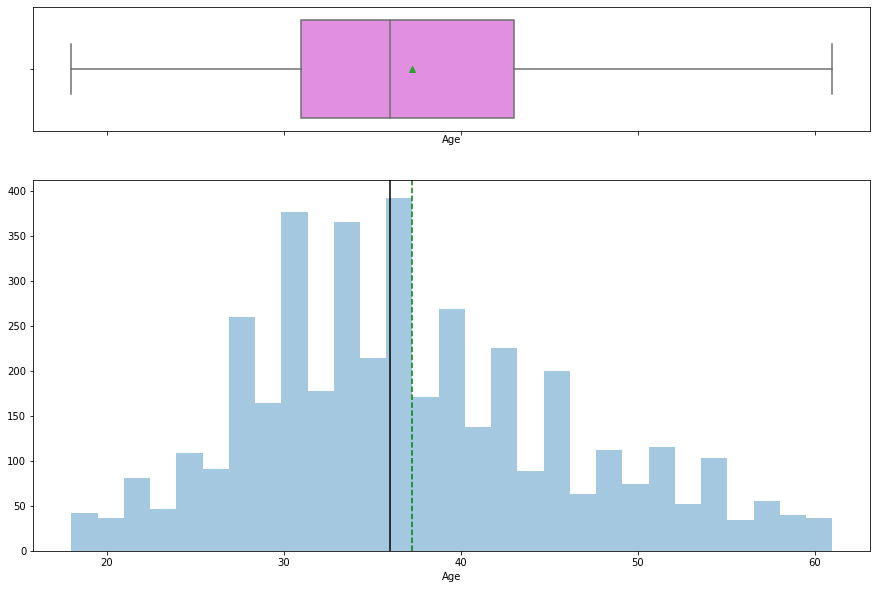

In [22]:
histogram_boxplot(data['Age'])

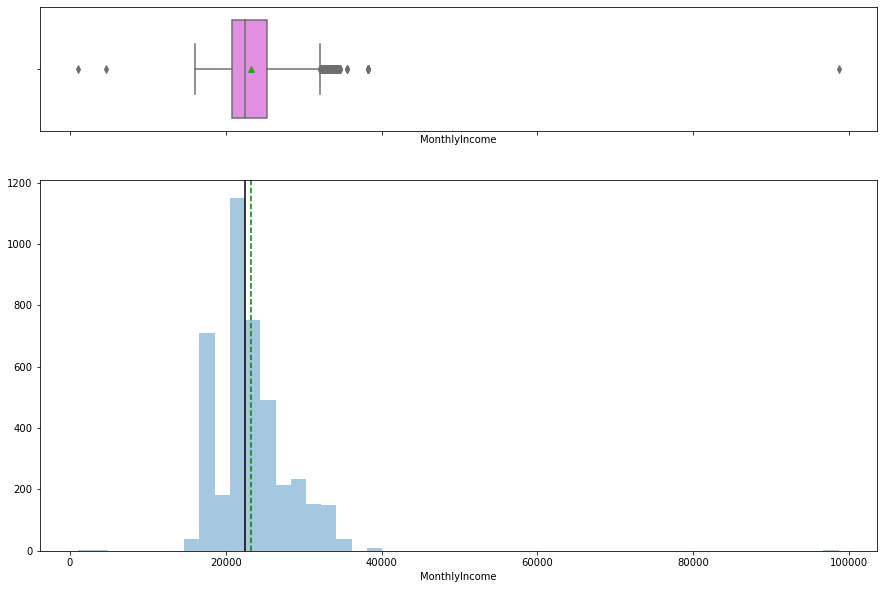

In [23]:
histogram_boxplot(data['MonthlyIncome'])

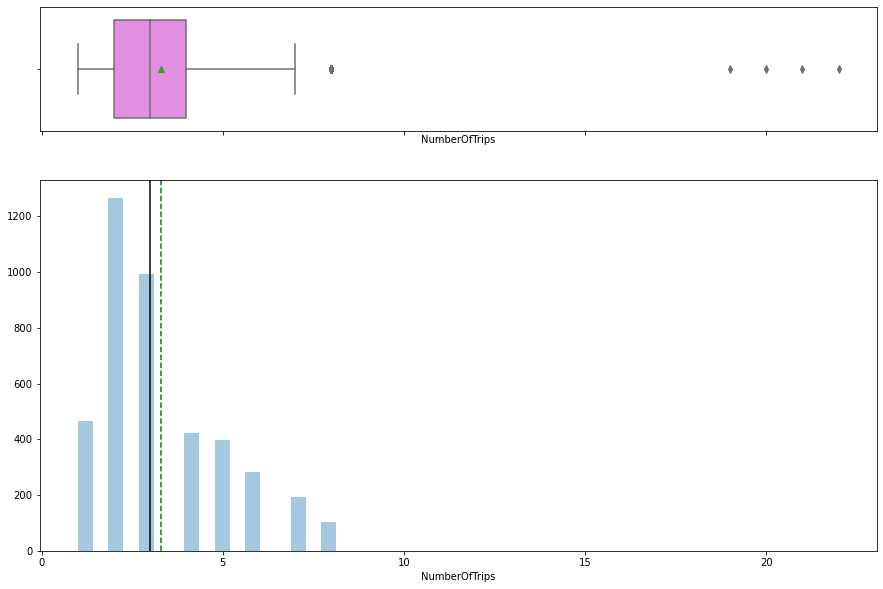

In [24]:
histogram_boxplot(data['NumberOfTrips'])

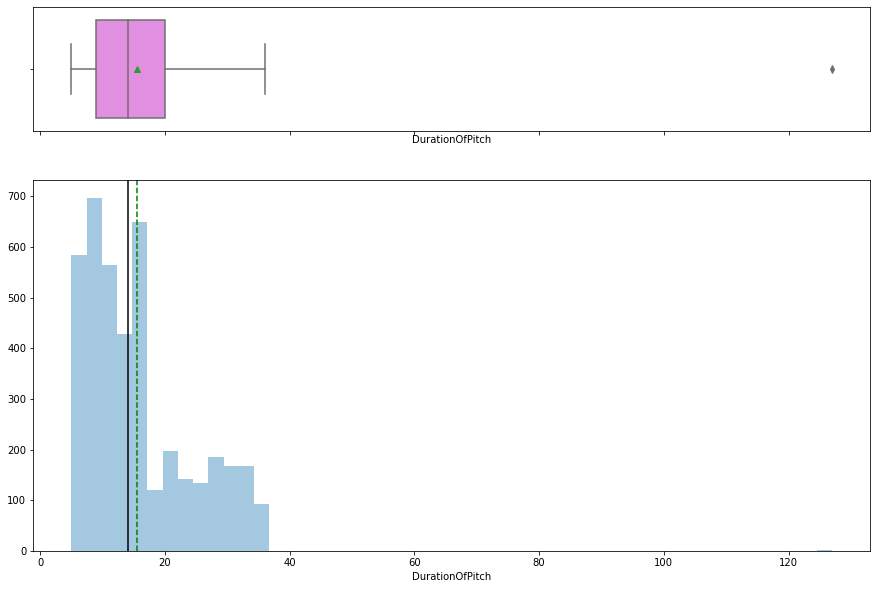

In [25]:
histogram_boxplot(data['DurationOfPitch'])

In [26]:
#Function to create barplots that indicate percentage for Pitch Satisfaction category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

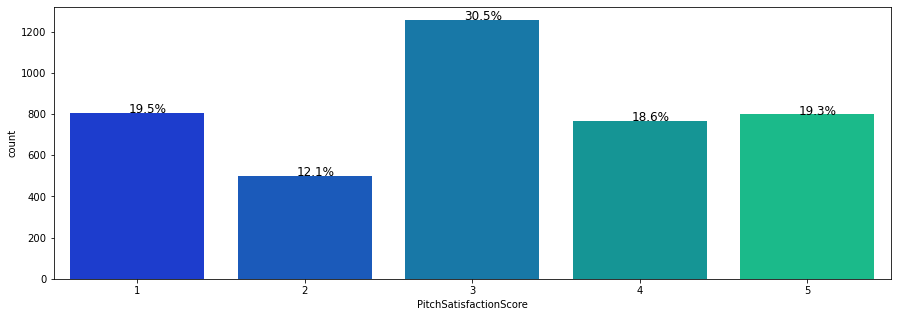

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["PitchSatisfactionScore"],palette='winter')
perc_on_bar(ax,data["PitchSatisfactionScore"])

Customer Interaction Insights: 

Most of the wines are rated either 5 or 6 out of 10.

There are very less records for 3, 4, and 8 rated wines.

To create a more balanced target variable we can combine records to create two broad categories - low quality wines and high quaity: 2-6 rating = low quality, 7-8 = high quality.

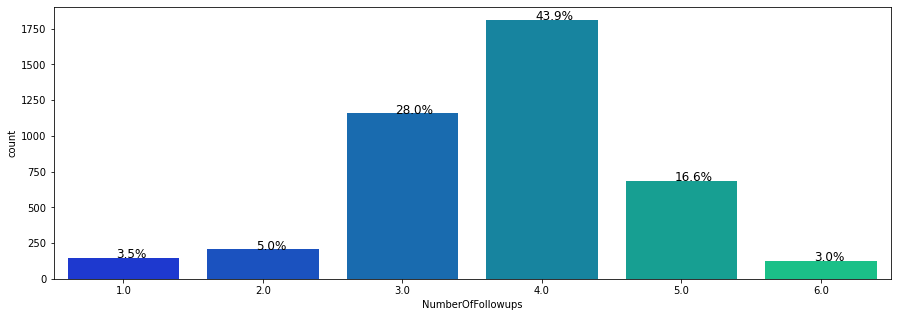

In [28]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data["NumberOfFollowups"],palette='winter')
perc_on_bar(ax,data["NumberOfFollowups"])

Customer Interaction Insights: 

Most of the wines are rated either 5 or 6 out of 10.

There are very less records for 3, 4, and 8 rated wines.

To create a more balanced target variable we can combine records to create two broad categories - low quality wines and high quaity: 2-6 rating = low quality, 7-8 = high quality.

Bivariate Analysis

In [29]:
data.corr() # It will show correlation matrix 

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,...,ProductPitched_Super Deluxe,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried,Designation_AVP,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
ProdTaken,1.000000,-0.154934,0.090921,0.082220,0.003716,0.110966,0.100325,0.015424,0.271293,0.052029,...,-0.075308,-0.073883,-0.124316,0.190461,0.056726,-0.075308,0.217802,-0.141486,-0.037331,-0.043391
Age,-0.154934,1.000000,0.005257,-0.002732,-0.024490,-0.025567,-0.030549,0.173654,0.027115,0.012785,...,0.306345,0.045743,0.068686,-0.108240,-0.033571,0.306345,-0.369277,0.033918,0.167917,0.170513
CityTier,0.090921,0.005257,1.000000,0.011842,0.001327,0.026067,-0.016851,-0.016664,0.004885,-0.028863,...,0.026679,0.007815,-0.029976,-0.043904,0.075572,0.026679,-0.262172,0.215882,0.066770,-0.041949
DurationOfPitch,0.082220,-0.002732,0.011842,1.000000,0.076593,0.016850,-0.007312,0.007090,0.036499,0.007625,...,0.023198,0.012444,0.029634,-0.044289,-0.009153,0.023198,-0.040696,0.036634,0.020416,-0.069551
NumberOfPersonVisited,0.003716,-0.024490,0.001327,0.076593,1.000000,0.324766,0.041511,0.186989,0.006441,-0.017631,...,-0.102224,0.025671,0.021419,-0.146728,0.089423,-0.102224,0.040587,0.067379,-0.019966,-0.126323
NumberOfFollowups,0.110966,-0.025567,0.026067,0.016850,0.324766,1.000000,-0.018089,0.131478,0.001100,0.005452,...,-0.083112,-0.025130,-0.039793,-0.040271,0.120060,-0.083112,0.002191,0.039782,0.024192,-0.060069
PreferredPropertyStar,0.100325,-0.030549,-0.016851,-0.007312,0.041511,-0.018089,1.000000,0.006867,0.001218,-0.019274,...,-0.013571,-0.003431,0.015740,-0.010641,-0.006999,-0.013571,0.002961,-0.020271,0.041103,-0.027540
NumberOfTrips,0.015424,0.173654,-0.016664,0.007090,0.186989,0.131478,0.006867,1.000000,0.009450,-0.005757,...,0.027455,0.006309,0.034570,-0.070553,0.016730,0.027455,-0.059347,0.052208,0.004895,-0.027243
Passport,0.271293,0.027115,0.004885,0.036499,0.006441,0.001100,0.001218,0.009450,1.000000,0.009694,...,0.015974,-0.006742,0.001437,0.030349,-0.024874,0.015974,0.021861,-0.014435,-0.013362,-0.015965
PitchSatisfactionScore,0.052029,0.012785,-0.028863,0.007625,-0.017631,0.005452,-0.019274,-0.005757,0.009694,1.000000,...,0.057974,0.032559,-0.029880,0.016633,-0.010754,0.057974,0.004662,-0.038700,-0.002234,0.020049


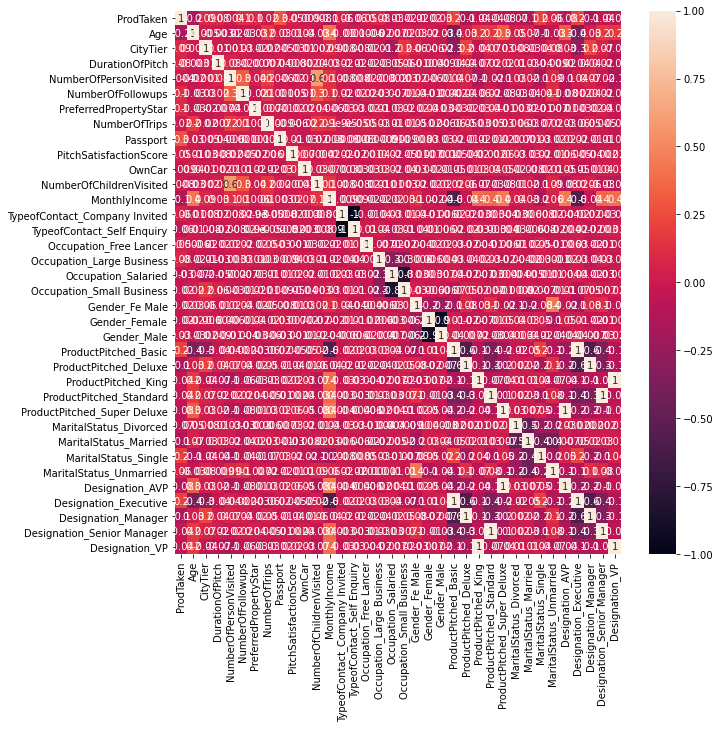

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g')
plt.show()

In [31]:
data.corr()["ProdTaken"].abs().sort_values(ascending = False)

ProdTaken                        1.000000
Passport                         0.271293
Designation_Executive            0.217802
ProductPitched_Basic             0.217802
MaritalStatus_Single             0.190461
Age                              0.154934
ProductPitched_Deluxe            0.141486
Designation_Manager              0.141486
MonthlyIncome                    0.133581
MaritalStatus_Married            0.124316
NumberOfFollowups                0.110966
PreferredPropertyStar            0.100325
CityTier                         0.090921
DurationOfPitch                  0.082220
Occupation_Large Business        0.079387
ProductPitched_Super Deluxe      0.075308
Designation_AVP                  0.075308
MaritalStatus_Divorced           0.073883
MaritalStatus_Unmarried          0.056726
TypeofContact_Self Enquiry       0.055797
TypeofContact_Company Invited    0.055797
PitchSatisfactionScore           0.052029
Occupation_Free Lancer           0.045010
Designation_VP                   0

Insight:

Passport and Designation_Executive columns have a notable correlation with "Target" column.

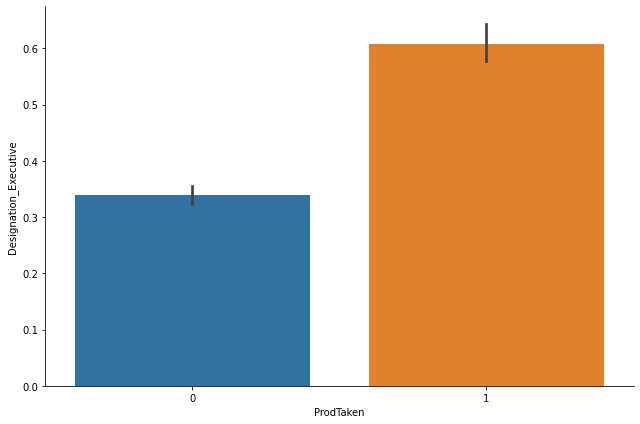

In [32]:
sns.catplot(x="ProdTaken", y="Designation_Executive", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

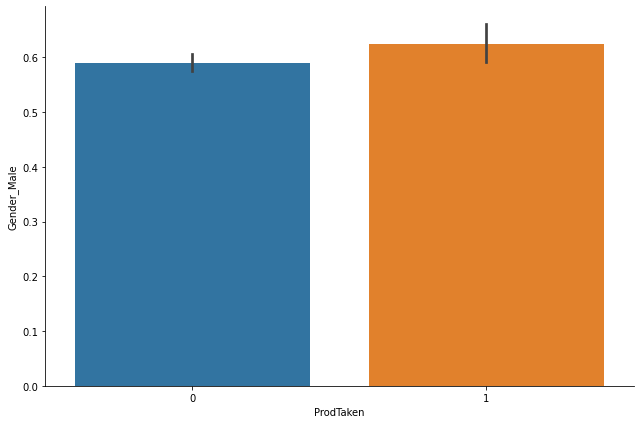

In [33]:
sns.catplot(x="ProdTaken", y="Gender_Male", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

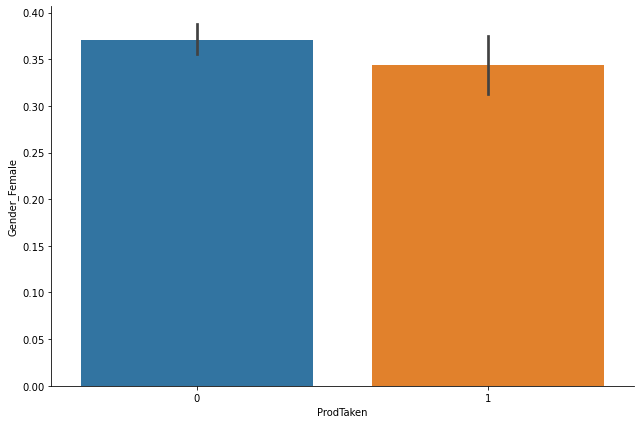

In [34]:
sns.catplot(x="ProdTaken", y="Gender_Female", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

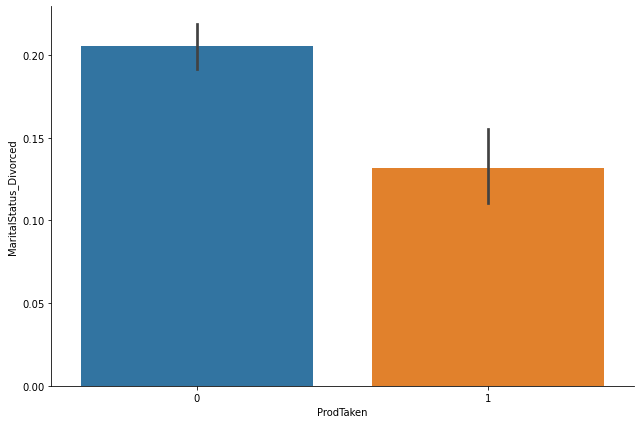

In [35]:
sns.catplot(x="ProdTaken", y="MaritalStatus_Divorced", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

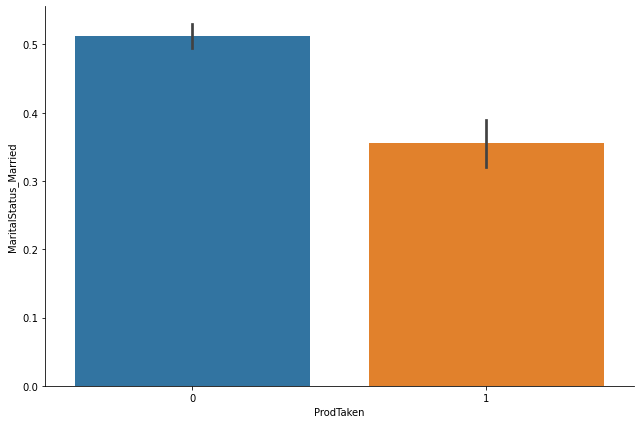

In [36]:
sns.catplot(x="ProdTaken", y="MaritalStatus_Married", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

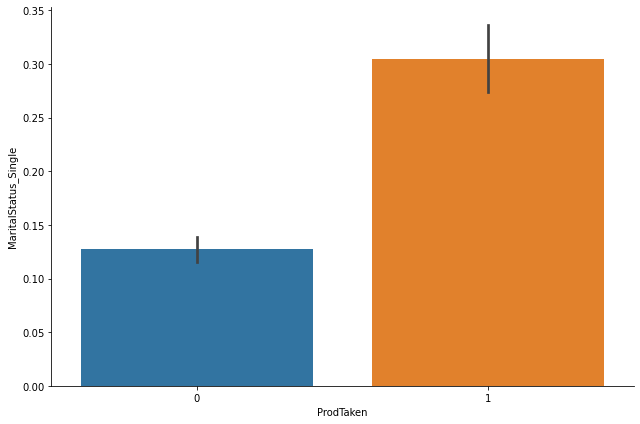

In [37]:
sns.catplot(x="ProdTaken", y="MaritalStatus_Single", data=data, kind='bar', size=6, aspect=1.5, estimator=np.mean);

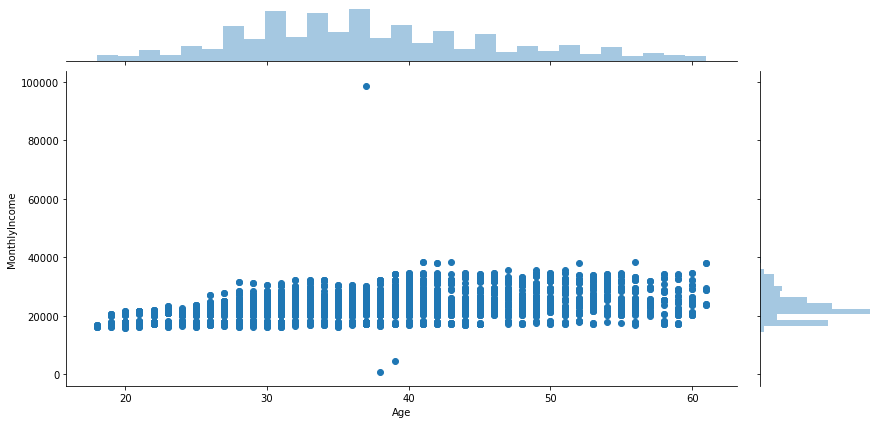

In [38]:
my_plot=sns.jointplot(x="Age",y="MonthlyIncome",data=data,kind="scatter")
my_plot.fig.set_figwidth(13)

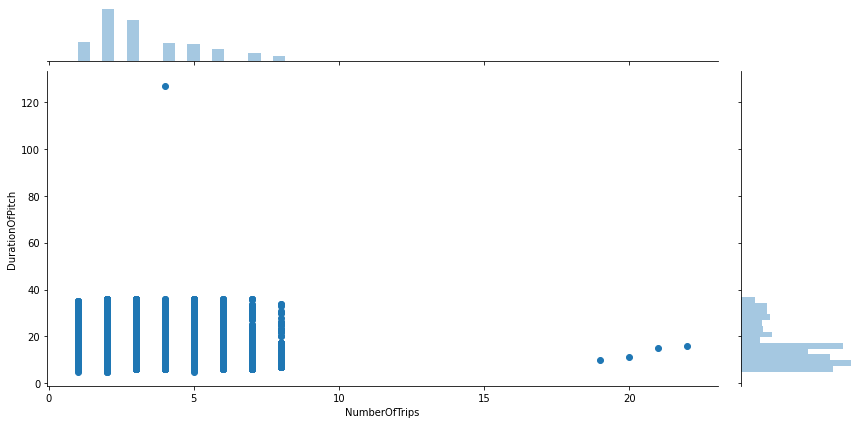

In [39]:
my_plot=sns.jointplot(x="NumberOfTrips",y="DurationOfPitch",data=data,kind="scatter")
my_plot.fig.set_figwidth(13)

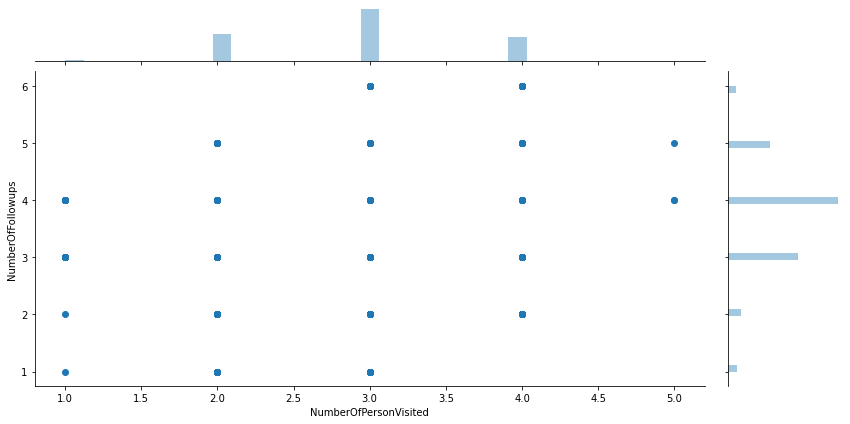

In [40]:
my_plot=sns.jointplot(x="NumberOfPersonVisited",y="NumberOfFollowups",data=data,kind="scatter")
my_plot.fig.set_figwidth(13)

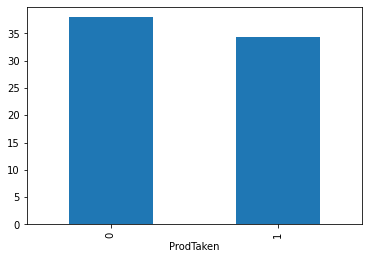

In [41]:
data.groupby('ProdTaken')['Age'].mean().plot(kind='bar')

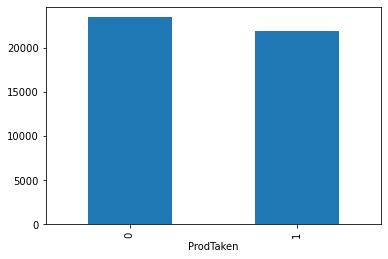

In [42]:
data.groupby('ProdTaken')['MonthlyIncome'].mean().plot(kind='bar')

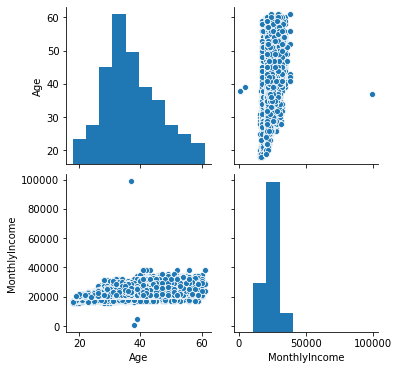

In [43]:
sns.pairplot(data.loc[:,["Age", "MonthlyIncome"]])

Insights:

Average age who purchased product is 60 years old with a medium income of 40K

In [44]:
data[(data["Passport"] == 0) & (data["ProdTaken"] == 0)].count()["ProdTaken"]

2549

In [45]:
data[(data["Designation_Executive"] == 0) & (data["ProdTaken"] == 0)].count()["ProdTaken"]

2201

Insights:

Majority of the clients were out of country or they travel a lot because they had a passport and there currently Executive in the organization     

In [46]:
data.drop(["Passport"], axis=1, inplace=True)

Create the training set and test set in ration of 70:30

In [47]:
X = data.drop(["ProdTaken"], axis=1)
y = data.pop("ProdTaken")

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

Preproces columns 

In [49]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

Create Logistic Regression model and print the accuracy 

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model_liblinear = LogisticRegression(random_state=1, solver="liblinear", max_iter=1000, class_weight={0:0.5,1:2})
model_liblinear.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 2}, max_iter=1000, random_state=1,
                   solver='liblinear')

In [52]:
y_predict_liblinear = model_liblinear.predict(X_test)
print("X_train liblinear acc:" + str(model_liblinear.score(X_train, y_train)))
print("X_train liblinear acc:" + str(model_liblinear.score(X_test, y_test)))

X_train liblinear acc:0.7099342332987193
X_train liblinear acc:0.6860371267150929


In [53]:
metrics.confusion_matrix(y_test, y_predict_liblinear,labels=[0, 1])

array([[684, 306],
       [ 83, 166]], dtype=int64)

In [54]:
print(metrics.classification_report(y_test, y_predict_liblinear))

              precision    recall  f1-score   support

           0       0.89      0.69      0.78       990
           1       0.35      0.67      0.46       249

    accuracy                           0.69      1239
   macro avg       0.62      0.68      0.62      1239
weighted avg       0.78      0.69      0.71      1239



In [55]:
model_liblinear.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 0.5, 1: 2}, max_iter=1000, random_state=1,
                   solver='liblinear')

In [56]:
y_predict_libnear = model_liblinear.predict(X_test_scaled)
print("X_train_scaled liblinear acc:" + str(model_liblinear.score(X_train_scaled, y_train)))
print("X_test_scaled liblinear acc:" + str(model_liblinear.score(X_test_scaled, y_test)))

X_train_scaled liblinear acc:0.7033575631706472
X_test_scaled liblinear acc:0.6997578692493946


In [57]:
metrics.confusion_matrix(y_test, y_predict_libnear,labels=[0, 1])

array([[711, 279],
       [ 93, 156]], dtype=int64)

In [58]:
print(metrics.classification_report(y_test, y_predict_libnear))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       990
           1       0.36      0.63      0.46       249

    accuracy                           0.70      1239
   macro avg       0.62      0.67      0.62      1239
weighted avg       0.78      0.70      0.73      1239



In [59]:
model_liblinear.fit(X_train, y_train)
acc_liblinear = model_liblinear.score(X_test, y_test)
y_predict_libnear = model_liblinear.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_libnear, labels=[1])
model_liblinear.fit(X_train_scaled, y_train)
acc_liblinear_scaled = model_liblinear.score(X_test_scaled, y_test)
y_predict_libnear_scaled = model_liblinear.predict(X_test_scaled)
f1_score_target_1_scaled = metrics.f1_score(y_test, y_predict_libnear_scaled, labels=[1])
resultsDf = pd.DataFrame({'Method':['Logistic Regression', 'Logistic Regression scaled'], 
                          'accuracy': [acc_liblinear, acc_liblinear_scaled],
                          'f1-score for ProdTaken': [f1_score_target_1, f1_score_target_1_scaled]})
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140


Create Decision Tree model and print the accuracy

In [60]:
model_dTree = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=15, max_leaf_nodes=20, class_weight={0:1,1:3})
model_dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, criterion='entropy',
                       max_depth=15, max_leaf_nodes=20, random_state=1)

In [61]:
print("X_train dTree acc:" + str(model_dTree.score(X_train, y_train)))
print("X_test dTree acc:" + str(model_dTree.score(X_test, y_test)))

X_train dTree acc:0.7822776047075113
X_test dTree acc:0.7586763518966909


In [62]:
y_predict_dTree = model_dTree.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_dTree,labels=[0, 1])

array([[816, 174],
       [125, 124]], dtype=int64)

In [63]:
print(metrics.classification_report(y_test, y_predict_dTree))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       990
           1       0.42      0.50      0.45       249

    accuracy                           0.76      1239
   macro avg       0.64      0.66      0.65      1239
weighted avg       0.78      0.76      0.77      1239



In [64]:
model_dTree.fit(X_train, y_train)
acc_dTree = model_dTree.score(X_test, y_test)
y_predict_dTree = model_dTree.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_dTree, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Decision Tree'], 
                          'accuracy': [acc_dTree],
                          'f1-score for ProdTaken': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140
0,Decision Tree,0.758676,0.453382


Calculating feature importance from Decision Tree

In [65]:
feat_importances = model_dTree.tree_.compute_feature_importances(normalize=True)
feat_cols = X_train.columns

feat_imp_dict = dict(zip(feat_cols, feat_importances))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
ProductPitched_Basic,0.255879
DurationOfPitch,0.149245
CityTier,0.113905
NumberOfFollowups,0.104571
Age,0.081143
MonthlyIncome,0.073747
MaritalStatus_Single,0.070908
PreferredPropertyStar,0.069166
PitchSatisfactionScore,0.052004
NumberOfTrips,0.029433


Insights:

This illustrates that ProductPitched and DurationOfPitch are key variables that impact the analysis

Create Random Forest model and print the accuracy 

In [66]:
from sklearn.ensemble import RandomForestClassifier
model_rfcl = RandomForestClassifier(random_state=1, n_estimators=50, max_features=25, class_weight={0:1,1:4}, max_depth=15, min_samples_leaf=14)
model_rfcl.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=15, max_features=25,
                       min_samples_leaf=14, n_estimators=50, random_state=1)

In [67]:
print("X_train rfcl acc:" + str(model_rfcl.score(X_train, y_train)))
print("X_test rfcl acc:" + str(model_rfcl.score(X_test, y_test)))

X_train rfcl acc:0.8795430944963655
X_test rfcl acc:0.7982243744955609


In [68]:
y_predict_rfcl = model_rfcl.predict(X_test)
metrics.confusion_matrix(y_test, y_predict_rfcl,labels=[0, 1])

array([[826, 164],
       [ 86, 163]], dtype=int64)

In [69]:
print(metrics.classification_report(y_test, y_predict_rfcl))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       990
           1       0.50      0.65      0.57       249

    accuracy                           0.80      1239
   macro avg       0.70      0.74      0.72      1239
weighted avg       0.82      0.80      0.81      1239



In [70]:
model_rfcl.fit(X_train, y_train)
acc_rfcl = model_rfcl.score(X_test, y_test)
y_predict_rfcl = model_rfcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_rfcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Random Forest'], 
                          'accuracy': [acc_rfcl],
                          'f1-score for ProdTaken': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140
0,Decision Tree,0.758676,0.453382
0,Random Forest,0.798224,0.565972


Create Adaboost Ensemble and print the accuracy 

In [71]:
from sklearn.ensemble import AdaBoostClassifier
model_abcl = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=2, class_weight={0:1,1:4}),
    n_estimators=50, random_state=1)
model_abcl.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 4},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         random_state=1),
                   random_state=1)

In [72]:
y_predict_ab = model_abcl.predict(X_test)
print("X_train abcl acc:" + str(model_abcl.score(X_train, y_train)))
print("X_test abcl acc:" + str(model_abcl.score(X_test, y_test)))

X_train abcl acc:0.8217376254759432
X_test abcl acc:0.7506053268765133


In [73]:
metrics.confusion_matrix(y_test, y_predict_ab,labels=[0, 1])

array([[770, 220],
       [ 89, 160]], dtype=int64)

In [74]:
print(metrics.classification_report(y_test, y_predict_ab))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83       990
           1       0.42      0.64      0.51       249

    accuracy                           0.75      1239
   macro avg       0.66      0.71      0.67      1239
weighted avg       0.80      0.75      0.77      1239



In [75]:
model_rfcl.fit(X_train, y_train)
acc_abcl = model_abcl.score(X_test, y_test)
y_predict_abcl = model_abcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_abcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['AdaBoost'], 
                          'accuracy': [acc_abcl],
                          'f1-score for ProdTaken': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140
0,Decision Tree,0.758676,0.453382
0,Random Forest,0.798224,0.565972
0,AdaBoost,0.750605,0.508744


Create GradientBoost Ensemble and print the accuracy 

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbcl = GradientBoostingClassifier(n_estimators=50, learning_rate=1, random_state=1)
model_gbcl.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=1, n_estimators=50, random_state=1)

In [77]:
y_predict_gb = model_gbcl.predict(X_test)
print("X_train gbcl acc:" + str(model_gbcl.score(X_train, y_train)))
print("X_test gbcl acc:" + str(model_gbcl.score(X_test, y_test)))

X_train gbcl acc:0.9456559363101419
X_test gbcl acc:0.8385794995964487


In [78]:
metrics.confusion_matrix(y_test, y_predict_gb,labels=[0, 1])

array([[926,  64],
       [136, 113]], dtype=int64)

In [79]:
print(metrics.classification_report(y_test, y_predict_gb))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       990
           1       0.64      0.45      0.53       249

    accuracy                           0.84      1239
   macro avg       0.76      0.69      0.72      1239
weighted avg       0.83      0.84      0.83      1239



In [80]:
model_gbcl.fit(X_train, y_train)
acc_gbcl = model_gbcl.score(X_test, y_test)
y_predict_gbcl = model_gbcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_gbcl, labels=[1])
model_gbcl.fit(X_train_scaled, y_train)
acc_gbcl_scaled = model_gbcl.score(X_test_scaled, y_test)
y_predict_gbcl_scaled = model_gbcl.predict(X_test_scaled)
f1_score_target_1_scaled = metrics.f1_score(y_test, y_predict_gbcl_scaled, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['GradientBoost', 'GradientBoost scaled'], 
                          'accuracy': [acc_gbcl, acc_gbcl_scaled],
                          'f1-score for ProdTaken': [f1_score_target_1, f1_score_target_1_scaled]})])
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140
0,Decision Tree,0.758676,0.453382
0,Random Forest,0.798224,0.565972
0,AdaBoost,0.750605,0.508744
0,GradientBoost,0.838579,0.530516
1,GradientBoost scaled,0.812752,0.462963


Create Bagging Ensemble and print the accurarcy

In [81]:
from sklearn.ensemble import BaggingClassifier

model_bgcl = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9, class_weight={0:1,1:4}),
                         n_estimators=50, max_samples=.5, random_state=1)
model_bgcl.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                      1: 4},
                                                        criterion='entropy',
                                                        max_depth=9,
                                                        random_state=1),
                  max_samples=0.5, n_estimators=50, random_state=1)

In [82]:
y_predict_bg = model_bgcl.predict(X_test)
print("X_train bgcl acc:" + str(model_bgcl.score(X_train, y_train)))
print("X_test bgcl acc:" + str(model_bgcl.score(X_test, y_test)))

X_train bgcl acc:0.9525787469712703
X_test bgcl acc:0.8531073446327684


In [83]:
metrics.confusion_matrix(y_test, y_predict_bg,labels=[0, 1])

array([[950,  40],
       [142, 107]], dtype=int64)

In [84]:
print(metrics.classification_report(y_test, y_predict_bg))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       990
           1       0.73      0.43      0.54       249

    accuracy                           0.85      1239
   macro avg       0.80      0.69      0.73      1239
weighted avg       0.84      0.85      0.84      1239



In [85]:
model_bgcl.fit(X_train, y_train)
acc_bgcl = model_bgcl.score(X_test, y_test)
y_predict_bgcl = model_bgcl.predict(X_test)
f1_score_target_1 = metrics.f1_score(y_test, y_predict_bgcl, labels=[1])
resultsDf = pd.concat([resultsDf, pd.DataFrame({'Method':['Bagging'], 
                          'accuracy': [acc_bgcl],
                          'f1-score for ProdTaken': [f1_score_target_1]})])
resultsDf

,Method,accuracy,f1-score for ProdTaken
0,Logistic Regression,0.686037,0.460472
1,Logistic Regression scaled,0.699758,0.456140
0,Decision Tree,0.758676,0.453382
0,Random Forest,0.798224,0.565972
0,AdaBoost,0.750605,0.508744
0,GradientBoost,0.838579,0.530516
1,GradientBoost scaled,0.812752,0.462963
0,Bagging,0.853107,0.540404


Results

Based on problem statement, the Bagging is the best model to help the marketing team identify potential customers, which has both high "accuracy" and "f1-score" for ProdTaken = "1".

Turning the model

For Logistic Regression model:
    
class_weight={0:0.5,1:2}: Set to fix highly skewed ProdTaken column.
max_iter=1000: Maximum number of iterations taken for the solvers to converge = 1000.
Scaling parameters doesn't improve the prediction.

For Decision Tree model:

class_weight={0:1,1:3}: Set to fix the skewed ProdTaken column.
max_depth=15: Maximum depth of the tree = 15.
max_leaf_nodes=20: Maximum of leaf nodes = 20.
Decsion Tree did improve the prediction

For Random Forest model:

class_weight={0:1,1:4}: Set to fix the skewed ProdTaken column.
n_estimators=50: Number of trees in the forest = 50.
max_features=25: Number of features to consider when looking for the best split = 25.
max_depth=15: Maximum depth of the tree = 15.
min_samples_leaf=14: Minimum number of samples required to be at a leaf node = 14.
Random Forest did improve the prediction

For AdaBoost model:

class_weight={0:1,1:4}: Set to fix the skewed Target column.
n_estimators=50: Number of trees in the forest = 50.
max_depth=2: Maximum depth of the tree = 2.
AdaBoost doesn't improve the prediction 

For GradientBoost model:

n_estimators=50: Number of boosting stages to perform = 50.
learning_rate=1: Learning rate shrinks the contribution of each tree.
GradientBoost did improve the prediction, however the Scaling parameters doesn't improve the prediction.

For Bagging model:

base_estimator=DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=9, class_weight={0:1,1:4}): Base estimator to fit on random subsets of the dataset.
n_estimators=50: Number of base estimators = 50.
max_samples=.5: Number of samples to draw from X to train each base estimator = 50% sample.
Bagging did improve the prediction

Conclusion

The F1-score is a better way of combining the precision and recall of the model. Percision can be seen as a measure of quality, and recall as a measure of quantity. Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. ... In most real-life classification problems, imbalanced class distribution exists and thus F1-score is a better metric to evaluate this model.